## Objective: Loading the model and making predictions on the images 

In [2]:
#importing numpy, cv2, matplotlib and tensorflow below.

import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# importing image preprocessing library from tensorflow.
#load_img and img_to_array

from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [4]:
# loading the model and printing the success message below.

model = tf.keras.models.load_model('./models/object_detection.h5')
print('model loaded successfully')

model loaded successfully


In [5]:
# taking an image as sample testing 'Here Image N2.jpg'
# loading the image from its path.


path='./test_images/N2.jpg'
image=load_img(path)

# converting the image into array, an 8 bit array with values range (0,255)
image=np.array(image,dtype=np.uint8)

# providing the target size as 224X224
image1=load_img(path,target_size=(224,224))

# doing the normalization of the array image and getting the normalized output
image_arr_224=img_to_array(image1)/255.0

In [6]:
#finding the shape of our image.
# height, width and depth.

#getting the size of our original array.
h,w,d=image.shape
print("Height= ",h)
print("width= ",w)

Height=  510
width=  827


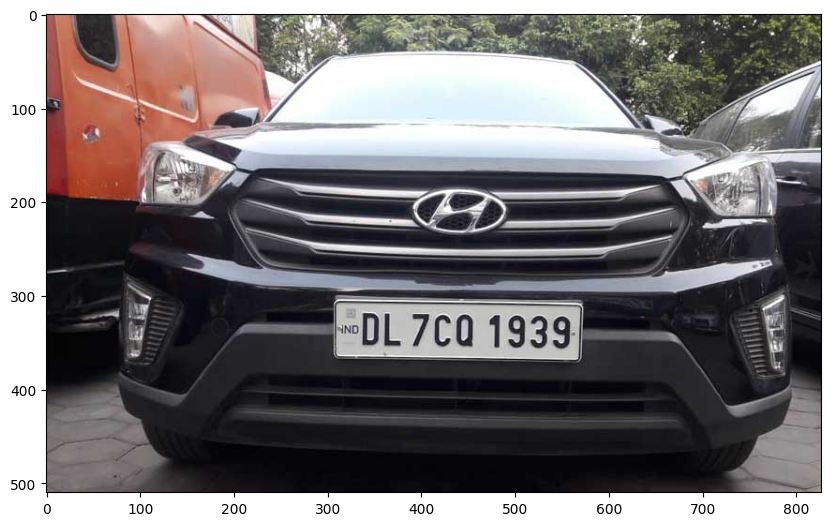

In [7]:
#providing the window size and printing it below.
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [8]:
#printing the image shape as per above values.
image_arr_224.shape

(224, 224, 3)

In [9]:
# providing the test image and giving it one more dimension
# this dimension is number of images, here it is 1.
test_arr=image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [10]:
# processing the image prediction via the trained model
#printing the coordinates of the predicted LicensePlate
# the coordinates are being printed in normalized floating values in float32 format

coords=model.predict(test_arr)
coords

1/1 [==============================] - 5s 5s/step


array([[0.35730517, 0.73400253, 0.62928027, 0.74030554]], dtype=float32)

In [11]:
#Doing the denormalized process like making it more understandable and meaningful.
# The denormalizing factors are xmin, xmax, ymin and ymax, refer Object detection file.

# After denormalizing the coordinates, printing the coordinates.
denorm=np.array([w,w,h,h])
coords=coords*denorm
coords

array([[295.49137485, 607.02009279, 320.93293726, 377.5558269 ]])

In [12]:
#changing the coordinates from float32 format to int32 format for rounding off

coords=coords.astype(np.int32)
coords

array([[295, 607, 320, 377]])

(295, 320) (607, 377)


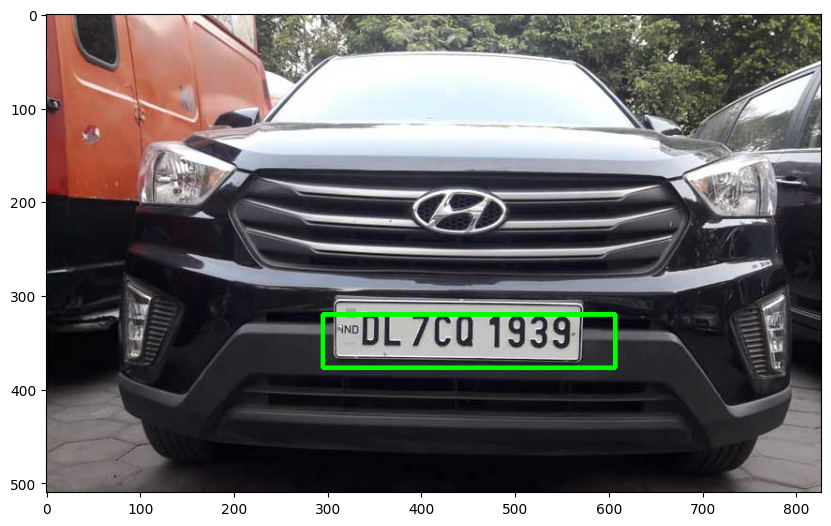

In [13]:
# Drawing Bounding box on the top of the image
# The bounding box points to the detected License Plate
# This is mainly the 4 coordinates being plotted on the image 
# and the points being joined together to draw the license Plate.

# xmin,ymin(bottom left)
# xmax, ymax(top right)
xmin,xmax,ymin,ymax=coords[0]
pt1=(xmin,ymin)
pt2=(xmax,ymax)

#Printing the coordinates
print(pt1,pt2)

#printing the bounding box.
# A window will open showing the License Plate
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

## Creating Final Pipeline of the Model

In [14]:
#Creating Pipeline
 
path='./test_images/N2.jpg'

def object_detection(path):
    #read image
    image=load_img(path) #PIL Object
    image=np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1=load_img(path,target_size=(224,224))
    #data preprocessing
    
    #convert into array and get the normalized output
    image_arr_224=img_to_array(image1)/255.0
    h,w,d=image.shape
    test_arr=image_arr_224.reshape(1,224,224,3)

    #make Predictions
    coords=model.predict(test_arr)

    #Denormalize
    denorm=np.array([w,w,h,h])
    coords=coords*denorm

    #Changing the Datatype
    coords=coords.astype(np.int32)

    # Drawing Bounding box on the top of the image
    xmin,xmax,ymin,ymax=coords[0]
    pt1=(xmin,ymin)
    pt2=(xmax,ymax)
    print(pt1,pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image,coords

1/1 [==============================] - 0s 240ms/step
(776, 619) (1770, 810)


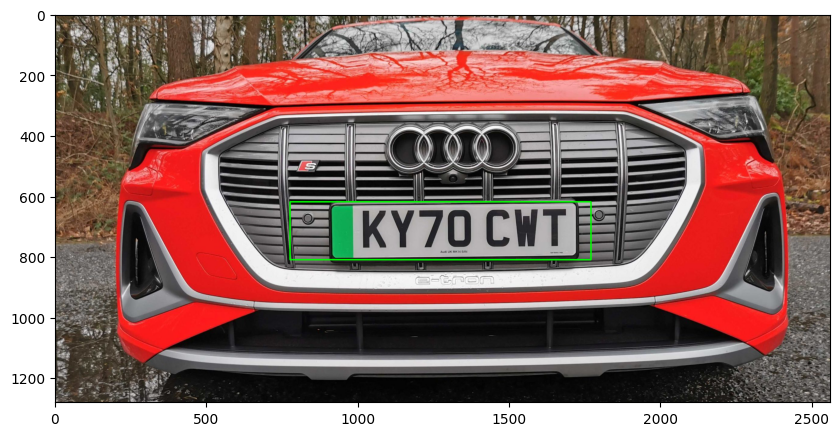

In [15]:
# After creating the generalised pipelined function above.
#Providing some images to this function and getting the object detection results

path='./test_images/N3.jpg'
image,coords=object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

### Optical Character Recoginition - OCR

In [16]:
#For Character Recoginition, we are going to use Python Tesseract OCR library.
# We are using this to read the License Plate Number from the Detected Image.

import pytesseract as pt

1/1 [==============================] - 0s 227ms/step
(177, 269) (690, 408)


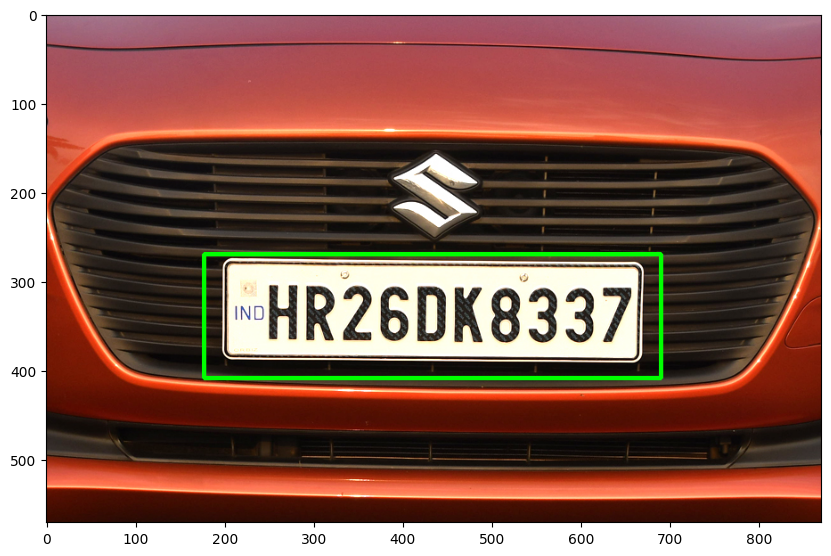

In [27]:
# For testing purpose, we are taking an image 'N1.jpg'.
# getting the image and its coordinates in a variable using pipeline function.

path='./test_images/N1.jpg'
image,coords=object_detection(path)

#printing the results below.
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [28]:
#Storing the coordinates of this detected Plate
xmin,xmax,ymin,ymax=coords[0]

In [29]:
# After the Detection, cropping the image by marking the coordinates
# Creating a roi(region of interest) image for our detected Numberplate.
img = np.array(load_img(path))
xmin,xmax,ymin,ymax=coords[0]
roi = img[ymin:ymax,xmin:xmax]

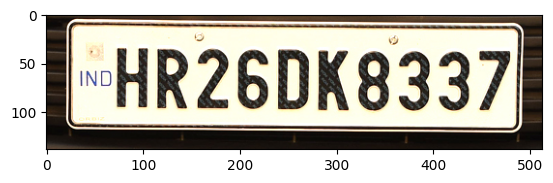

In [30]:
#Printing the LicensePlate Below.

plt.imshow(roi)
plt.show()

### Extract text from the image using Pytesseract Library

In [31]:
# For using this Pytesseract Library, we have already performed the setup process
# This process included the installation of Pytesseract Software in our OS.
# Setup of Environment Variable in the system and connecting it with our project.


#Now, providing the roi image to this pytesseract library function 
# to detect the License Plate.
text=pt.image_to_string(roi)

#At last, the function will detect this image and print it as shown below.
print(text)

*~DHR26DK8‘337




####  Creating the Frontend Platform (Optional Upgradation for the model )

Till Now, Our Project Gets Completed.
After this, we need to create a frontend Platform for our model input output and result.

For this, we need to setup VScode as our IDE.
Installing the extensions in VScode like, flask, bootstrap4, django, autocomplete, boilerplates and snippets for HTML, flask-snippet.

Rest will be explained in the Frontend Platform Code Files. See you there.